# Final Project

Welcome to the final practical project for our course on [Data Science Bootcamp](https://open.hpi.de/courses/datascience2023). Throughout this project, you will go through the entire data science process, starting from data loading and cleaning, all the way to running a model and making predictions. This hands-on project will provide you with valuable experience and allow you to apply the concepts and techniques you've learned in the course. Get ready to dive into real-world data analysis and build your skills as a data scientist!


## Important Remarks:

 - The ultimate goal of this project is to conduct comprehensive data analysis and build 2 models using the provided datasets.
 - Code is not the only thing graded here. Well-written and understandable documentation of your code is to be expected
 - Clear reasoning behind your choices in every step of the notebook is important. Be it the choice of a data cleaning technique or selecting certain features in your analysis or the choice of your 2 models.

# Importing packages


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier,  export_graphviz
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, f1_score, recall_score
from IPython.display import Image
import pydotplus
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset into data


In [11]:
#In this data set, the delimiter between columns is a ";", therefore it was necessary to specify it

# To keep the original dataset, it will be saved in a variable called "raw_supermarket"


raw_supermarket = pd.read_csv("supermarket_survey.csv",delimiter=';')

# Dataset overview and statistical summary


In [12]:
raw_supermarket.head(10000)

,randomInt,age,gender,district,modeOfTransportation,distance,G03Q13amountOfPeople,income,frequency,days[1],...,satisGlutenfreeProducts,satisAnimalProducts,ideasExtendedBusiness,ideasHelpCarry,ideasCustomerCouncil,ideasFreeWifi,ideasTouchDisplay,ideasSelfCheckout,ideasBikeParking,ideasUndergroundParking
0,4,NaN,Male,Godham,Own Car,1-2km,3,120000.0,Twice,No,...,8.0,7.0,2.0,4.0,3.0,4.0,NaN,4.0,NaN,NaN
1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,20-25,Female,Springtown,Own Car,>7km,2,15.0,Three times,No,...,7.0,NaN,7.0,7.0,7.0,7.0,NaN,7.0,7.0,7.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,1337.0,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,15-20,Male,Piltunder,Own Car,1-2km,4,250000.0,Twice,No,...,8.0,1.0,9.0,2.0,1.0,10.0,10.0,10.0,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,1,60-65,Male,Piltunder,Walking,1-2km,2,45700.0,Twice,No,...,9.0,6.0,8.0,9.0,5.0,5.0,1.0,6.0,7.0,9.0
349,2,30-35,Male,Godham,Own Car,1-2km,3,50.0,Three times,No,...,5.0,7.0,9.0,8.0,8.0,8.0,8.0,9.0,9.0,10.0
350,3,20-25,Male,Godham,Walking,1-2km,2,5.5,Once,No,...,7.0,7.0,4.0,6.0,NaN,8.0,9.0,9.0,9.0,8.0
351,4,35-40,Male,Piltunder,Own Car,3-5km,4,600.0,Once,No,...,7.0,8.0,8.0,9.0,9.0,10.0,10.0,10.0,10.0,7.0


In [13]:
raw_supermarket.describe()

,randomInt,income,satisGeneralStore,satisMusic,satisQualityProducts,satisGeneralAssortment,satisVeganProducts,satisOrganicProducts,satisGlutenfreeProducts,satisAnimalProducts,ideasExtendedBusiness,ideasHelpCarry,ideasCustomerCouncil,ideasFreeWifi,ideasTouchDisplay,ideasSelfCheckout,ideasBikeParking,ideasUndergroundParking
count,353.000000,331.000000,332.000000,288.000000,329.000000,330.000000,274.000000,301.000000,209.000000,307.000000,324.000000,322.000000,318.000000,324.000000,320.000000,323.000000,312.000000,300.000000
mean,2.609065,66275.568882,7.424699,5.236111,7.498480,7.278788,6.350365,6.767442,6.315789,7.348534,6.919753,3.711180,3.232704,6.410494,5.571875,7.857585,7.602564,5.396667
std,1.105322,132542.950482,1.705790,2.507094,1.479792,1.674366,2.177444,1.981347,2.269317,1.902618,3.129760,3.027465,2.668179,3.147757,3.197936,2.668804,2.752793,3.321057
min,1.000000,-99932.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2290.000000,7.000000,3.000000,7.000000,7.000000,5.000000,6.000000,5.000000,6.500000,5.000000,1.000000,1.000000,4.000000,3.000000,7.000000,6.000000,2.000000
50%,3.000000,21000.000000,8.000000,5.000000,8.000000,8.000000,7.000000,7.000000,6.000000,8.000000,8.000000,2.000000,2.000000,7.000000,6.000000,9.000000,8.000000,6.000000
75%,4.000000,80284.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000,9.000000,10.000000,6.000000,5.000000,9.000000,9.000000,10.000000,10.000000,8.000000
max,4.000000,999999.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [14]:
raw_supermarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   randomInt                353 non-null    int64  
 1   age                      345 non-null    object 
 2   gender                   347 non-null    object 
 3   district                 334 non-null    object 
 4   modeOfTransportation     341 non-null    object 
 5   distance                 338 non-null    object 
 6   G03Q13amountOfPeople     345 non-null    object 
 7   income                   331 non-null    float64
 8   frequency                339 non-null    object 
 9   days[1]                  353 non-null    object 
 10  days[2]                  353 non-null    object 
 11  days[3]                  353 non-null    object 
 12  days[4]                  353 non-null    object 
 13  days[5]                  353 non-null    object 
 14  days[6]                  3

In [15]:
raw_supermarket.isnull().sum()

randomInt                    0
age                          8
gender                       6
district                    19
modeOfTransportation        12
distance                    15
G03Q13amountOfPeople         8
income                      22
frequency                   14
days[1]                      0
days[2]                      0
days[3]                      0
days[4]                      0
days[5]                      0
days[6]                      0
days[7]                      0
time[1]                      0
time[2]                      0
time[3]                      0
time[4]                      0
time[5]                      0
moneySpent                  15
orderingItems               19
deliveringItems             20
willingPayDelivery         187
findProducts                19
usingDiscounts              27
preferCash                  22
preferCashless              24
isRelaxing                  26
satisGeneralStore           21
satisMusic                  65
satisQua

# Data cleaning

In [16]:
# I would delete "satisGlutenfreeProducts" and "willingPayDelivery" due to their high number of NaN

supermarket=raw_supermarket.drop(columns=['willingPayDelivery','satisGlutenfreeProducts'])

In [17]:
#The income column has negative values, they are turned into NaN here

supermarket['income'] = np.where(supermarket['income'] < 0, np.nan, supermarket['income'])

In [18]:
#HANDLING THE MISSING VALUES

# For the income column, the NaN are replaced with the median, as the data is quite skewed

supermarket['income']=supermarket['income'].fillna(value=supermarket['income'].median())



# For the remaining categorical variables, the mode is used

#age
supermarket['age']=supermarket['age'].fillna(value=supermarket['age'].mode()[1]) #it was chosen the group 35-40

#gender
supermarket['gender']=supermarket['gender'].fillna(value=supermarket['gender'].mode()[0])

#district
supermarket['district']=supermarket['district'].fillna(value=supermarket['district'].mode()[0])

#modeOfTransportation
supermarket['modeOfTransportation']=supermarket['modeOfTransportation'].fillna(value=supermarket['modeOfTransportation'].mode()[0])

#distance
supermarket['distance']=supermarket['distance'].fillna(value=supermarket['distance'].mode()[0])

#G03Q13amountOfPeople
supermarket['G03Q13amountOfPeople']=supermarket['G03Q13amountOfPeople'].fillna(value=supermarket['G03Q13amountOfPeople'].mode()[0])

#frequency
supermarket['frequency']=supermarket['frequency'].fillna(value=supermarket['frequency'].mode()[0])


#days[ ] - is probably the several days of the week
#time[ ] - is probably the several times of day


#moneySpent 
supermarket['moneySpent']=supermarket['moneySpent'].fillna(value=supermarket['moneySpent'].mode()[0])

#orderingItems - mode (maybe also change the name of the option)
supermarket['orderingItems']=supermarket['orderingItems'].fillna(value=supermarket['orderingItems'].mode()[0])

# deliveringItems  - mode (maybe also change the name of the option)
supermarket['deliveringItems']=supermarket['deliveringItems'].fillna(value=supermarket['deliveringItems'].mode()[0])

#findProducts - mode
supermarket['findProducts']=supermarket['findProducts'].fillna(value=supermarket['findProducts'].mode()[0])

#usingDiscounts - mode
supermarket['usingDiscounts']=supermarket['usingDiscounts'].fillna(value=supermarket['usingDiscounts'].mode()[0])

#preferCash - mode
supermarket['preferCash']=supermarket['preferCash'].fillna(value=supermarket['preferCash'].mode()[0])

#preferCashless - mode
supermarket['preferCashless']=supermarket['preferCashless'].fillna(value=supermarket['preferCashless'].mode()[0])

#isRelaxing - mode
supermarket['isRelaxing']=supermarket['isRelaxing'].fillna(value=supermarket['isRelaxing'].mode()[0])





# For the remaining numerical variables, the median is used

#satisGeneralStore - mode
supermarket['satisGeneralStore']=supermarket['satisGeneralStore'].fillna(value=supermarket['satisGeneralStore'].median())

#satisMusic - mode (maybe delete, or just not use. because data will be very biased)
supermarket['satisMusic']=supermarket['satisMusic'].fillna(value=supermarket['satisMusic'].median())

#satisQualityProducts - mode
supermarket['satisQualityProducts']=supermarket['satisQualityProducts'].fillna(value=supermarket['satisQualityProducts'].median())

#satisGeneralAssortment - mode
supermarket['satisGeneralAssortment']=supermarket['satisGeneralAssortment'].fillna(value=supermarket['satisGeneralAssortment'].median())

#satisVeganProducts - mode (maybe delete, or just not use. because data will be very biased)
supermarket['satisVeganProducts']=supermarket['satisVeganProducts'].fillna(value=supermarket['satisVeganProducts'].median())

#satisOrganicProducts - mode (maybe delete, or just not use. because data will be very biased)
supermarket['satisOrganicProducts']=supermarket['satisOrganicProducts'].fillna(value=supermarket['satisOrganicProducts'].median())

#satisAnimalProducts - mode (maybe delete, or just not use. because data will be very biased)
supermarket['satisAnimalProducts']=supermarket['satisAnimalProducts'].fillna(value=supermarket['satisAnimalProducts'].median())


#ideasExtendedBusiness  - mode
supermarket['ideasExtendedBusiness']=supermarket['ideasExtendedBusiness'].fillna(value=supermarket['ideasExtendedBusiness'].median())

#ideasHelpCarry  - mode
supermarket['ideasHelpCarry']=supermarket['ideasHelpCarry'].fillna(value=supermarket['ideasHelpCarry'].mode()[0])

#ideasCustomerCouncil   - mode
supermarket['ideasCustomerCouncil']=supermarket['ideasCustomerCouncil'].fillna(value=supermarket['ideasCustomerCouncil'].median())

#ideasFreeWifi  - mode
supermarket['ideasFreeWifi']=supermarket['ideasFreeWifi'].fillna(value=supermarket['ideasFreeWifi'].median())

#ideasTouchDisplay  - mode
supermarket['ideasTouchDisplay']=supermarket['ideasTouchDisplay'].fillna(value=supermarket['ideasTouchDisplay'].median())

#ideasSelfCheckout  - mode
supermarket['ideasSelfCheckout']=supermarket['ideasSelfCheckout'].fillna(value=supermarket['ideasSelfCheckout'].median())

#ideasBikeParking  - mode
supermarket['ideasBikeParking']=supermarket['ideasBikeParking'].fillna(value=supermarket['ideasBikeParking'].median())

#ideasUndergroundParking - mode (maybe delete, or just not use. because data will be very biased)
supermarket['ideasUndergroundParking']=supermarket['ideasUndergroundParking'].fillna(value=supermarket['ideasUndergroundParking'].median())

# EDA

In [19]:
#checking the data

supermarket.isnull().sum()

randomInt                  0
age                        0
gender                     0
district                   0
modeOfTransportation       0
distance                   0
G03Q13amountOfPeople       0
income                     0
frequency                  0
days[1]                    0
days[2]                    0
days[3]                    0
days[4]                    0
days[5]                    0
days[6]                    0
days[7]                    0
time[1]                    0
time[2]                    0
time[3]                    0
time[4]                    0
time[5]                    0
moneySpent                 0
orderingItems              0
deliveringItems            0
findProducts               0
usingDiscounts             0
preferCash                 0
preferCashless             0
isRelaxing                 0
satisGeneralStore          0
satisMusic                 0
satisQualityProducts       0
satisGeneralAssortment     0
satisVeganProducts         0
satisOrganicPr

In [20]:
le = LabelEncoder()

# variables that may take part in our models, and require change from 'categorical' to 'binary/numerical'

#age
supermarket['age']=le.fit_transform(supermarket['age'])

#gender
supermarket['gender']=le.fit_transform(supermarket['gender'])

#mode of Transportation
supermarket['modeOfTransportation']=le.fit_transform(supermarket['modeOfTransportation'])

#Distance
supermarket['distance']=le.fit_transform(supermarket['distance'])

#Amount of people they buy things for (?)
supermarket['G03Q13amountOfPeople']=le.fit_transform(supermarket['G03Q13amountOfPeople'])

#frequency
supermarket['frequency']=le.fit_transform(supermarket['frequency'])


#moneySpent
supermarket['moneySpent']=le.fit_transform(supermarket['moneySpent'])


#orderingItems
supermarket['orderingItems']=le.fit_transform(supermarket['orderingItems'])

#deliveringItems
supermarket['deliveringItems']=le.fit_transform(supermarket['deliveringItems'])

#findProducts
supermarket['findProducts']=le.fit_transform(supermarket['findProducts'])


#usingDiscounts
supermarket['usingDiscounts']=le.fit_transform(supermarket['usingDiscounts'])

#preferCash
supermarket['preferCash']=le.fit_transform(supermarket['preferCash'])

#preferCashless
supermarket['preferCashless']=le.fit_transform(supermarket['preferCashless'])

#isRelaxing
supermarket['isRelaxing']=le.fit_transform(supermarket['isRelaxing'])


#days[1]
supermarket['days[1]']=le.fit_transform(supermarket['days[1]'])

#days[2]
supermarket['days[2]']=le.fit_transform(supermarket['days[2]'])

#days[3]
supermarket['days[3]']=le.fit_transform(supermarket['days[3]'])

#days[4]
supermarket['days[4]']=le.fit_transform(supermarket['days[4]'])

#days[5]
supermarket['days[5]']=le.fit_transform(supermarket['days[5]'])

#days[6]
supermarket['days[6]']=le.fit_transform(supermarket['days[6]'])

#days[7]
supermarket['days[7]']=le.fit_transform(supermarket['days[7]'])

#time[1]
supermarket['time[1]']=le.fit_transform(supermarket['time[1]'])

#time[2]
supermarket['time[2]']=le.fit_transform(supermarket['time[2]'])

#time[3]
supermarket['time[3]']=le.fit_transform(supermarket['time[3]'])

#time[4]
supermarket['time[4]']=le.fit_transform(supermarket['time[4]'])

#time[5]
supermarket['time[5]']=le.fit_transform(supermarket['time[5]'])



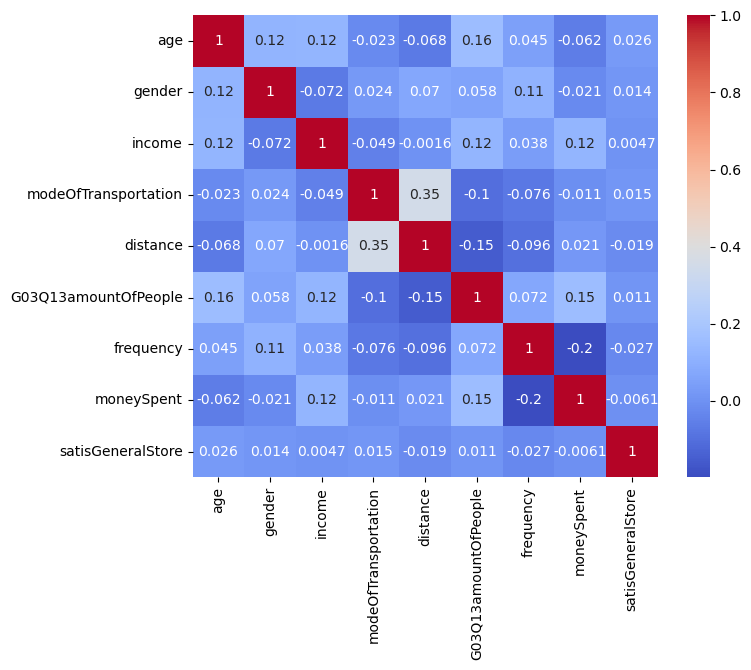

In [21]:
#heat maps to see correlations between variables (several were necessary to see as much correlations as possible)

#several tests where run interchanging the variables from one subset to another to see as many correlations as possible


#explanations and insights of each subset/heatmap in the Reports/Insights section (at the end)
subset=supermarket[['age','gender', 'income','modeOfTransportation', 'distance','G03Q13amountOfPeople', 'frequency','moneySpent','satisGeneralStore']]
correlation = subset.corr()


subset2=supermarket[['orderingItems','deliveringItems', 'findProducts', 'usingDiscounts', 'preferCash', 'preferCashless', 'isRelaxing','moneySpent', 'satisGeneralStore']]
correlation2 = subset2.corr()


subset3=supermarket[['days[1]','days[2]', 'days[3]', 'days[4]', 'days[5]', 'days[6]', 'days[7]', 'time[1]', 'time[2]', 'time[3]', 'time[4]', 'time[5]', 'moneySpent','satisGeneralStore']]
correlation3 = subset3.corr()

subset4=supermarket[['ideasExtendedBusiness', 'ideasHelpCarry', 'ideasCustomerCouncil', 'ideasFreeWifi', 'ideasTouchDisplay', 'ideasSelfCheckout', 'ideasBikeParking','moneySpent','satisGeneralStore']]
correlation4 = subset4.corr()


#plot the chosen heatmap
plt.figure(figsize=(7.5, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

<AxesSubplot:xlabel='time[1]', ylabel='Count'>

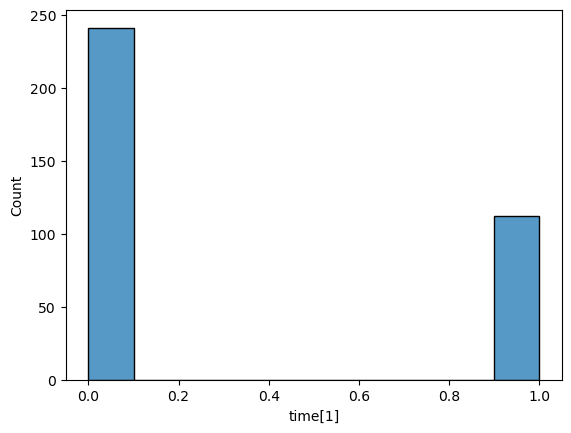

In [22]:
#check statistics for each day/time of the week (variable is already binary)

sns.histplot(supermarket['time[1]'])

<AxesSubplot:xlabel='time[4]', ylabel='Count'>

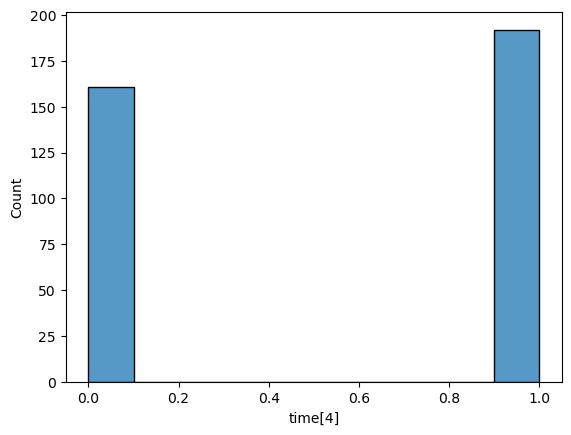

In [23]:
sns.histplot(supermarket['time[4]'])

# Data Processing and normalization

In [24]:
scaler = StandardScaler()

# Creating ML model 1

In [25]:
# Let's go with decision trees

In [26]:
#defining the variables (explanation for why these variables were chosen in the Report section)

X = supermarket[['income','frequency','G03Q13amountOfPeople']]
y = supermarket['moneySpent']

In [27]:
#train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


X_train =scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

In [28]:
#define the DT classifier
DTC = DecisionTreeClassifier(max_depth=4)
#increasing too much the depth of the tree leads to signs of overfitting (training score increases, but testing score decreases)

#fit the trainning data
DTC.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

## Prediction on Test data

In [29]:
#make the prediction
y_pred=DTC.predict(X_test)

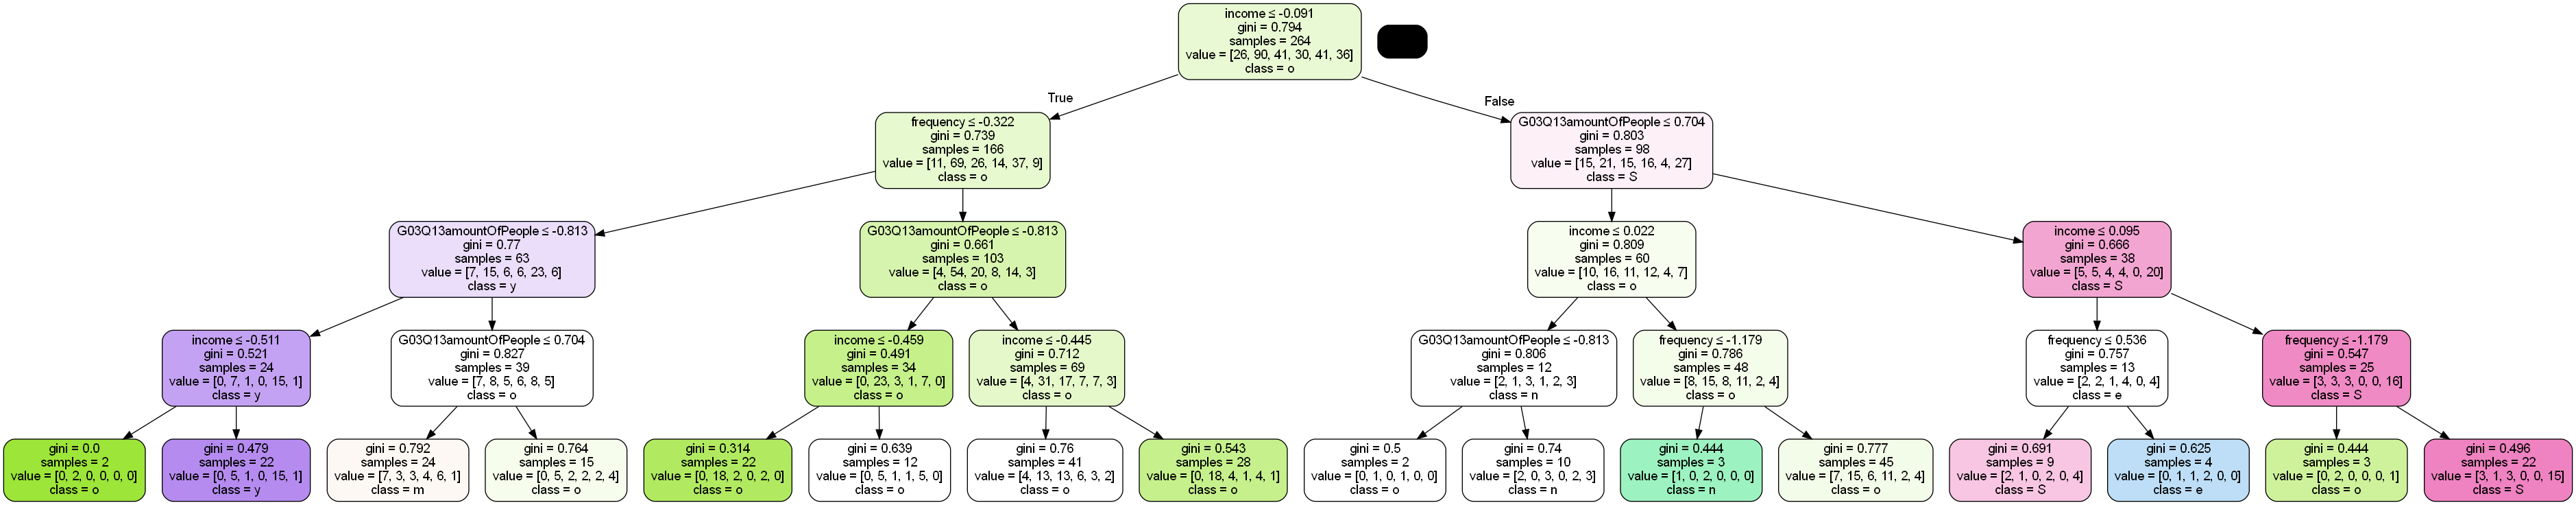

In [30]:
# Visualize the decision tree
dot_data = export_graphviz(DTC, out_file=None,
                     feature_names=['income','frequency','G03Q13amountOfPeople'],
                     class_names='moneySpent',
                     filled=True, rounded=True,
                     special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Model 1 Performance

In [31]:
#How well did the model do in training?

train_score = round(DTC.score(X_train, y_train),3)*100
print("Training Score:", train_score)

Training Score: 48.1


In [32]:
#How well did the model do in testing?

test_score = round(DTC.score(X_test, y_test),3)*100
print("Tresting Score:", test_score)

Tresting Score: 40.400000000000006


In [33]:
#How well does the model predict the unseen data?

accuracy = round(accuracy_score(y_test, y_pred),3)*100
print("Accuracy:", accuracy)

Accuracy: 40.400000000000006


# Creating ML model 2

In [34]:
#logistic regression

In [35]:
#defining the variables

X = supermarket[['income','frequency','G03Q13amountOfPeople']]
y = supermarket['moneySpent']


In [36]:
#train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train =scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

In [37]:
# Create an instance of the logistic regression model
logistic_regression = LogisticRegression()

# Fit the model on the training data
model=logistic_regression.fit(X_train, y_train)

## Prediction on Test data

In [38]:
# Make predictions on the test data
y_pred = logistic_regression.predict(X_test)

## ## Model 2 Performance

In [39]:
#How well did the model do in training?

train_score = round(model.score(X_train, y_train),3)*100
print("Training Score:", train_score)

Training Score: 42.0


In [40]:
#How well did the model do in testing?

test_score = round(model.score(X_test, y_test),3)*100
print("Tresting Score:", test_score)

Tresting Score: 36.0


In [41]:
#How well does the model predict the unseen data?

accuracy = round(accuracy_score(y_test, y_pred),3)*100
print("Accuracy:", accuracy)

Accuracy: 36.0


# Report and insight from your analysis

### Data Overview and Cleaning

First of all, it was necessary to handle the missing data. $\textit{willingPayDelivery}$ and $\textit{satisGlutenfreeProducts}$ were deleted since there were too many $\textbf{NaN}$ for these features. 

For $\textit{income}$ it was necessary to correct values that were negative. These were converted into $\textbf{NaN}$ (see the 2nd cell in Data Cleaning), and then all the $\textbf{NaN}$ in this column imputed with the $\underline{Median}$, as the distribution was quite skewed (for this, the Median is better than the $\underline{Mean}$). For the remaining float64 type variables, such as the ones related with evaluation of the store ($\textit{satisGeneralStore}$, $\textit{satisMusic}$, etc.), the median was also used.

For the categorical variables ($\textit{frequency}$, $\textit{district}$, $\textit{moneySpent}$, etc.) imputation was done using the $\underline{Mode}$. 

### EDA Insights

It was necessary to perform Label Encoding, as most of the variables were categorical. Heatmaps then permitted to relate the variables. Several heatmaps had to be done in order to properly visualize all the relations between variables. 

Potential target variables would be the $\textit{moneySpent}$, or one of the parameters regarding the costumer satisfaction (for example, $\textit{satisGeneralStore}$). As such, these were included in all the heatmaps that were done. Even though only $\textit{satisGeneralStore}$ is present in final version of the code (in the coding of each heatmap), this variable was changed by every other ‘satisfaction’ variable featured in the dataset table, in order to see all possible correlations. The heatmaps coding is done in the same cell, and they were plotted one at a time.

#### Heatmap 1

This heatmap includes potential input features such as $\textit{age}$, $\textit{gender}$, $\textit{income}$, among others. No relevant correlations were seen between the satisfaction variables and the possible input variables. For $\textit{moneySpent}$, the most significant correlations are observed to be with the $\textit{income}$, $\textit{frequency}$ and $\textit{G03Q13amountOfPeople}$. These coefficients are not very high (around 0.1 and 0.2) but are higher when comparing to the rest of the heatmap. The highest correlation for this heatmap is between $\textit{distance}$ and $\textit{modeOfTransportation}$: the further the customer is, the more frequent it is for him/her to take a car, or taxi, or take some transportation rather than walking or taking a bike. 

#### Heatmap 2

The second heatmap includes $\textit{orderingItems}$, $\textit{deliveringItems}$, $\textit{findProducts}$, $\textit{preferCash}$, etc. The strongest correlations here include: $\textit{orderingItems}$ with $\textit{deliveringItems}$, which makes sense as people who order products may be more prone to ask for them to be delivered as well; and $\textit{preferCash}$ with $\textit{preferCashless}$ which are pretty much opposites. Additionally, it was found that $\textit{findProducts}$ (which is assumed to correspond to the easiness of finding a product in the supermarket) is somewhat correlated with nearly all the satisfaction features by factors around 0.2, which quite higher than most of the remaining correlations. The strongest correlation for $\textit{moneySpent}$ is with $\textit{orderingItems}$, with only -0.15 of correlation.

#### Heatmap 3

The third heat map shows the correlations with the days and times of shopping. It is assumed that $\textit{days[]}$ and $\textit{time[]}$ correspond to the several days of the week, and the several times of the day, respectively. Since we do not have documentation, it was assumed that $\textit{days[1]}$ is Monday and so $\textit{days[7]}$ is Sunday. Similarly, dividing the day in 5 parts from 8 a.m. to 9 p.m. (or 21), we can approximate that $\textit{time[1]}$ corresponds to the interval 8:00-10:30; $\textit{time[2]}$ to 10:30-13:00; $\textit{time[3]}$ to 13:00-16:00; $\textit{time[4]}$ to 16:00-18:30; and $\textit{time[5]}$ to 18:30-21:00. To note: this are rough approximations and assumptions. In a more precise study, we would need proper documentation.

However, no correlations are apparent in this heat map. Nonetheless, we can do an independent study about when people go to the supermarket. By plotting histograms for each of these variables, it is easy to see that as the week goes on, more people start going to the supermarket. Particularly, on Friday we see that the number of people that go to the supermarket comes close to the number of people that do not go, even surpassing it on Saturday ($\textit{days[6]}$). On Sunday we go back to a big majority of people not going to the supermarket. In fact the ratio of not going/going to the supermarket is the biggest on this day. Regarding times of day, $\textit{time[4]}$ (late afternoon) is the only one where the answer ‘Yes’ prevails over ‘No’ which makes sense as it should be the time when people are getting of work and are going to do their groceries.

#### Heatmap 4

The last heatmap shows the $\textit{ideas...}$ variables, assumed to correspond to suggestions from customers to improve the supermarket experience. These were evaluated against each other and against the possible input variables. No relevant correlations appear to have been found for the possible input variables, neither with the $\textit{moneySpent}$ or satisfaction variables, however. Some high correlations were found between the $\textit{ideas...}$ variables themselves, such as $\textit{ideasHelpCarry}$ and $\textit{ideasCustomerCouncil}$, as well as $\textit{ideasTouchDisplay}$ and $\textit{ideasFreeWifi}$. Regardless, I don’t think it is very relevant to use these variables as inputs to predict other variables of the same type (i.e., use $\textit{ideas...}$ features to predict other $\textit{ideas...}$ features). For this reason, I did not employ them in the ML models.

### ML Model 1

Now for our models, it was decided to start with decision trees, given the great amount of variables possible as input. Regardless, I decided to only use $\textit{income}$, $\textit{frequency}$ and $\textit{G03Q13amountOfPeople}$, since they showed the highest correlation degrees with $\textit{moneySpent}$ (chosen to be the target variable). The depth of decision tree was chosen to be 4, since it optimized the score of the training and the testing/prediction. It was tried to add new input features, such as $\textit{orderingItems}$ (since it had a relatively high correlation degree compared with other variables), but the scores did not change. Maximum scores obtained were 48.1\%, 40.4\% and 40.4\% for training, testing and predicted data respectively. 

The scores all seem relatively close, with a small drop for testing and predicted data, which is considered normal. However, the scores are not very high (below 50\%), which may be indicative that the model is not performing very well nor achieving satisfactory results. This is probably related with the fact that no strong correlation between the target variable $\textit{moneySpent}$ and the input features is present. Still, these are the features with highest correlation coefficients with $\textit{moneySpent}$.  This indicates a poor quality of the data when it comes to modelling and predicting the output variable. Indeed, there are too many variables in the dataset, and most have very low correlation with one another. 

### ML Model 2

The lowe score seen before may also be a problem of the model itself. Logistic regression was chosen to be the second model, with hopes of providing a better score. Keeping the same input variables, the model ran and turns out the scores are slightly worse than previously, with 42%, 36% and 36% for training, testing and predicted data, respectively. This makes it clear that the poor model performances should be mostly fault of the data. Higher correlations between variables are needed for the models to make more accurate predictions and to perform better.